## NLP Exercise from learn.co

## Loading Libraries and Preliminary Analysis 
Given that this is a collection of short stories, greater care would need to be employed when addressing each story individually as well as accounting for whatever text might exist between each story, but the purpose of this notebook is to practice employment of NLP techniques.

In [1]:
import nltk
import requests
import sklearn

In [2]:
resp = requests.get('https://www.gutenberg.org/files/33525/33525-0.txt')
stories = resp.text

In [3]:
print(stories[:1760])

ï»¿The Project Gutenberg EBook of Stories from Tagore, by Rabindranath Tagore

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Stories from Tagore

Author: Rabindranath Tagore

Release Date: August 24, 2010 [EBook #33525]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK STORIES FROM TAGORE ***




Produced by Audrey Longhurst, Asad Razzaki and the Online
Distributed Proofreading Team at http://www.pgdp.net





Transcriber's Note:


  Variations in spelling and hyphenation have been retained as in
    the original.

  A few typographical errors have been corrected. A complete list
    follows the text.

  Words italicized in the original are surrounded by _underscores_.

  Words with bold emphasis in the original are surrounded by =equa

In [4]:
print(stories[1760:2000])

PREFACE


Every experienced teacher must have noticed the difficulty of
instructing Indian children out of books that are specially intended for
use in English schools. It is not merely that the subjects are
unfamiliar, but almost eve


In [5]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
stories_tokens_raw = nltk.regexp_tokenize(stories[1760:], pattern)
print(stories_tokens_raw[:100])

['PREFACE', 'Every', 'experienced', 'teacher', 'must', 'have', 'noticed', 'the', 'difficulty', 'of', 'instructing', 'Indian', 'children', 'out', 'of', 'books', 'that', 'are', 'specially', 'intended', 'for', 'use', 'in', 'English', 'schools', 'It', 'is', 'not', 'merely', 'that', 'the', 'subjects', 'are', 'unfamiliar', 'but', 'almost', 'every', 'phrase', 'has', 'English', 'associations', 'that', 'are', 'strange', 'to', 'Indian', 'ears', 'The', 'environment', 'in', 'which', 'they', 'are', 'written', 'is', 'unknown', 'to', 'the', 'Indian', 'school', 'boy', 'and', 'his', 'mind', 'becomes', 'overburdened', 'with', 'its', 'details', 'which', 'he', 'fails', 'to', 'understand', 'He', 'cannot', 'give', 'his', 'whole', 'attention', 'to', 'the', 'language', 'and', 'thus', 'master', 'it', 'quickly', 'The', 'present', 'Indian', 'story', 'book', 'avoids', 'some', 'at', 'least', 'of', 'these', 'impediments']


In [6]:
stories_tokens = [i.lower() for i in stories_tokens_raw]
print(stories_tokens[:100])

['preface', 'every', 'experienced', 'teacher', 'must', 'have', 'noticed', 'the', 'difficulty', 'of', 'instructing', 'indian', 'children', 'out', 'of', 'books', 'that', 'are', 'specially', 'intended', 'for', 'use', 'in', 'english', 'schools', 'it', 'is', 'not', 'merely', 'that', 'the', 'subjects', 'are', 'unfamiliar', 'but', 'almost', 'every', 'phrase', 'has', 'english', 'associations', 'that', 'are', 'strange', 'to', 'indian', 'ears', 'the', 'environment', 'in', 'which', 'they', 'are', 'written', 'is', 'unknown', 'to', 'the', 'indian', 'school', 'boy', 'and', 'his', 'mind', 'becomes', 'overburdened', 'with', 'its', 'details', 'which', 'he', 'fails', 'to', 'understand', 'he', 'cannot', 'give', 'his', 'whole', 'attention', 'to', 'the', 'language', 'and', 'thus', 'master', 'it', 'quickly', 'the', 'present', 'indian', 'story', 'book', 'avoids', 'some', 'at', 'least', 'of', 'these', 'impediments']


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sleep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Obtaining and Utilizing Stopwords

In [8]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
stop_words = set(stopwords.words('english'))
stories_tokens_stopped = [w for w in stories_tokens if not w in stop_words]
print(stories_tokens_stopped[:100])

['preface', 'every', 'experienced', 'teacher', 'must', 'noticed', 'difficulty', 'instructing', 'indian', 'children', 'books', 'specially', 'intended', 'use', 'english', 'schools', 'merely', 'subjects', 'unfamiliar', 'almost', 'every', 'phrase', 'english', 'associations', 'strange', 'indian', 'ears', 'environment', 'written', 'unknown', 'indian', 'school', 'boy', 'mind', 'becomes', 'overburdened', 'details', 'fails', 'understand', 'cannot', 'give', 'whole', 'attention', 'language', 'thus', 'master', 'quickly', 'present', 'indian', 'story', 'book', 'avoids', 'least', 'impediments', 'surroundings', 'described', 'students', 'everyday', 'life', 'sentiments', 'characters', 'familiar', 'stories', 'simply', 'told', 'notes', 'end', 'sufficient', 'explain', 'obscure', 'passages', 'possible', 'indian', 'student', 'follow', 'pages', 'book', 'easily', 'intelligently', 'students', 'read', 'stories', 'original', 'advantage', 'knowing', 'beforehand', 'whole', 'trend', 'narrative', 'thus', 'able', 'con

## Stemming and Lemmatizing

In [10]:
from nltk.stem import PorterStemmer, SnowballStemmer
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer('english')

In [11]:
example = [porter_stemmer.stem(e) for e in stories_tokens_stopped[:100]]
print(*example)

prefac everi experienc teacher must notic difficulti instruct indian children book special intend use english school mere subject unfamiliar almost everi phrase english associ strang indian ear environ written unknown indian school boy mind becom overburden detail fail understand cannot give whole attent languag thu master quickli present indian stori book avoid least impedi surround describ student everyday life sentiment charact familiar stori simpli told note end suffici explain obscur passag possibl indian student follow page book easili intellig student read stori origin advantag know beforehand whole trend narr thu abl concentr thought english languag propos publish togeth singl volum


In [12]:
print(*[snowball_stemmer.stem(w) for w in stories_tokens_stopped[:100]])

prefac everi experienc teacher must notic difficulti instruct indian children book special intend use english school mere subject unfamiliar almost everi phrase english associ strang indian ear environ written unknown indian school boy mind becom overburden detail fail understand cannot give whole attent languag thus master quick present indian stori book avoid least impedi surround describ student everyday life sentiment charact familiar stori simpli told note end suffici explain obscur passag possibl indian student follow page book easili intellig student read stori origin advantag know beforehand whole trend narrat thus abl concentr thought english languag propos publish togeth singl volum


In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
from nltk.corpus import wordnet
def get_wordnet_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sleep\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
nltk.pos_tag(stories_tokens_stopped)[:10]

[('preface', 'NN'),
 ('every', 'DT'),
 ('experienced', 'VBD'),
 ('teacher', 'NN'),
 ('must', 'MD'),
 ('noticed', 'VB'),
 ('difficulty', 'NN'),
 ('instructing', 'VBG'),
 ('indian', 'JJ'),
 ('children', 'NNS')]

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sleep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
stories_lemmas_pos = []
for x, y in nltk.pos_tag(stories_tokens_stopped):
    stories_lemmas_pos.append((x, get_wordnet_pos(y)))

### Can now compare the lemmatized words to the unlemmatized

In [19]:
meta_lemmaed = []
for word, pos in stories_lemmas_pos:
    meta_lemmaed.append(lemmatizer.lemmatize(word, pos=pos))
print(*zip(stories_tokens_stopped[100:200], meta_lemmaed[100:200]), sep='\n')

('original', 'original')
('stories', 'story')
('whose', 'whose')
('english', 'english')
('translations', 'translation')
('given', 'give')
('reader', 'reader')
('versions', 'version')
('stories', 'story')
('different', 'different')
('indian', 'indian')
('vernaculars', 'vernacular')
('already', 'already')
('appeared', 'appear')
('others', 'others')
('likely', 'likely')
('follow', 'follow')
('two', 'two')
('longest', 'long')
('stories', 'story')
('book', 'book')
('master', 'master')
('mashai', 'mashai')
('son', 'son')
('rashmani', 'rashmani')
('reproduced', 'reproduce')
('english', 'english')
('first', 'first')
('time', 'time')
('rest', 'rest')
('stories', 'story')
('taken', 'take')
('slight', 'slight')
('revision', 'revision')
('two', 'two')
('english', 'english')
('volumes', 'volume')
('entitled', 'entitle')
('hungry', 'hungry')
('stones', 'stone')
('mashi', 'mashi')
('short', 'short')
('paragraph', 'paragraph')
('added', 'add')
('original', 'original')
('bengali', 'bengali')
('end', 'e

## Frequency Distributions

In [20]:
from nltk import FreqDist
meta_freqdist = FreqDist(meta_lemmaed)
meta_freqdist.most_common(50)

[('would', 290),
 ('word', 229),
 ('say', 226),
 ('come', 225),
 ('go', 223),
 ('one', 215),
 ('could', 154),
 ('day', 154),
 ('take', 147),
 ('mother', 136),
 ('make', 132),
 ('time', 111),
 ('work', 109),
 ('mean', 105),
 ('house', 102),
 ('haralal', 102),
 ('give', 101),
 ('kalipada', 101),
 ('ask', 100),
 ('little', 98),
 ('get', 93),
 ('never', 91),
 ('like', 91),
 ('compare', 91),
 ('use', 89),
 ('old', 88),
 ('gutenberg', 88),
 ('english', 86),
 ('project', 86),
 ('call', 85),
 ('room', 85),
 ('boy', 83),
 ('hand', 83),
 ('son', 81),
 ('bhavani', 80),
 ('latin', 79),
 ('become', 79),
 ('father', 78),
 ('find', 78),
 ('heart', 75),
 ('know', 74),
 ('back', 74),
 ('look', 74),
 ('child', 72),
 ('away', 70),
 ('long', 68),
 ('tell', 67),
 ('great', 67),
 ('see', 65),
 ('man', 64)]

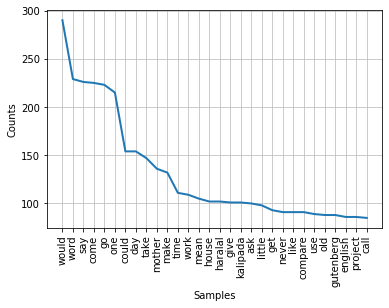

In [21]:
%matplotlib inline
meta_freqdist.plot(30, cumulative=False);

## Vectorization

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(meta_lemmaed)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [23]:
example_vector_doc_1 = cv.transform(meta_lemmaed)
example_vector_df = pd.DataFrame(example_vector_doc_1.toarray(), columns=cv.get_feature_names())
example_vector_df.head()

,abandon,abated,abdurrahman,abhaya,abide,abject,abjectly,able,ablution,abroad,...,xi,year,yellow,yes,yesterday,yet,young,youth,zip,zunjubil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Loading in Robert E. Howard and Edgar Rice Burroughs

In [24]:
resp_1 = requests.get('http://www.gutenberg.org/cache/epub/42182/pg42182.txt')
stories_1 = resp_1.text

In [25]:
print(stories_1[:2099])

﻿The Project Gutenberg EBook of The Hyborian Age, by Robert E. Howard

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: The Hyborian Age

Author: Robert E. Howard

Release Date: February 24, 2013 [EBook #42182]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK THE HYBORIAN AGE ***




Produced by Greg Weeks, Mary Meehan and the Online
Distributed Proofreading Team at http://www.pgdp.net









                          THE HYBORIAN AGE

                         By Robert E. Howard

    [Transcriber's Note: This etext was first published in The
    Phantagraph February, August, and October-November 1936 issues.
    Extensive research did not uncover any evidence that the U.S.
    copyright on this publication was renewed.]


    (Nothing in this article is to be cons

In [26]:
pattern_1 = "([a-zA-Z]+(?:'[a-z]+)?)"
stories_tokens_raw_1 = nltk.regexp_tokenize(stories_1[2099:], pattern_1)
print(stories_tokens_raw_1[:100])

['Of', 'that', 'epoch', 'known', 'by', 'the', 'Nemedian', 'chroniclers', 'as', 'the', 'Pre', 'Cataclysmic', 'Age', 'little', 'is', 'known', 'except', 'the', 'latter', 'part', 'and', 'that', 'is', 'veiled', 'in', 'the', 'mists', 'of', 'legendry', 'Known', 'history', 'begins', 'with', 'the', 'waning', 'of', 'the', 'Pre', 'Cataclysmic', 'civilization', 'dominated', 'by', 'the', 'kingdoms', 'of', 'Kamelia', 'Valusia', 'Verulia', 'Grondar', 'Thule', 'and', 'Commoria', 'These', 'peoples', 'spoke', 'a', 'similar', 'language', 'arguing', 'a', 'common', 'origin', 'There', 'were', 'other', 'kingdoms', 'equally', 'civilized', 'but', 'inhabited', 'by', 'different', 'and', 'apparently', 'older', 'races', 'The', 'barbarians', 'of', 'that', 'age', 'were', 'the', 'Picts', 'who', 'lived', 'on', 'islands', 'far', 'out', 'on', 'the', 'western', 'ocean', 'the', 'Atlanteans', 'who', 'dwelt', 'on', 'a']


In [27]:
stories_tokens_1 = [i.lower() for i in stories_tokens_raw_1]
print(stories_tokens_1[:100])

['of', 'that', 'epoch', 'known', 'by', 'the', 'nemedian', 'chroniclers', 'as', 'the', 'pre', 'cataclysmic', 'age', 'little', 'is', 'known', 'except', 'the', 'latter', 'part', 'and', 'that', 'is', 'veiled', 'in', 'the', 'mists', 'of', 'legendry', 'known', 'history', 'begins', 'with', 'the', 'waning', 'of', 'the', 'pre', 'cataclysmic', 'civilization', 'dominated', 'by', 'the', 'kingdoms', 'of', 'kamelia', 'valusia', 'verulia', 'grondar', 'thule', 'and', 'commoria', 'these', 'peoples', 'spoke', 'a', 'similar', 'language', 'arguing', 'a', 'common', 'origin', 'there', 'were', 'other', 'kingdoms', 'equally', 'civilized', 'but', 'inhabited', 'by', 'different', 'and', 'apparently', 'older', 'races', 'the', 'barbarians', 'of', 'that', 'age', 'were', 'the', 'picts', 'who', 'lived', 'on', 'islands', 'far', 'out', 'on', 'the', 'western', 'ocean', 'the', 'atlanteans', 'who', 'dwelt', 'on', 'a']


In [28]:
stories_tokens_stopped_1 = [w for w in stories_tokens_1 if not w in stop_words]
stories_tokens_stopped_1 = [w for w in stories_tokens_stopped_1 if not w in ['gutenberg', 'tm', 'e']]
print(stories_tokens_stopped_1[:100])

['epoch', 'known', 'nemedian', 'chroniclers', 'pre', 'cataclysmic', 'age', 'little', 'known', 'except', 'latter', 'part', 'veiled', 'mists', 'legendry', 'known', 'history', 'begins', 'waning', 'pre', 'cataclysmic', 'civilization', 'dominated', 'kingdoms', 'kamelia', 'valusia', 'verulia', 'grondar', 'thule', 'commoria', 'peoples', 'spoke', 'similar', 'language', 'arguing', 'common', 'origin', 'kingdoms', 'equally', 'civilized', 'inhabited', 'different', 'apparently', 'older', 'races', 'barbarians', 'age', 'picts', 'lived', 'islands', 'far', 'western', 'ocean', 'atlanteans', 'dwelt', 'small', 'continent', 'pictish', 'islands', 'main', 'thurian', 'continent', 'lemurians', 'inhabited', 'chain', 'large', 'islands', 'eastern', 'hemisphere', 'vast', 'regions', 'unexplored', 'land', 'civilized', 'kingdoms', 'though', 'enormous', 'extent', 'occupied', 'comparatively', 'small', 'portion', 'whole', 'planet', 'valusia', 'western', 'kingdom', 'thurian', 'continent', 'grondar', 'eastern', 'east', 'g

In [29]:
stories_lemmas_pos_1 = []
for x, y in nltk.pos_tag(stories_tokens_stopped_1):
    stories_lemmas_pos_1.append((x, get_wordnet_pos(y)))

In [30]:
meta_lemmaed_1 = []
for word, pos in stories_lemmas_pos_1:
    meta_lemmaed_1.append(lemmatizer.lemmatize(word, pos=pos))

In [31]:
meta_freqdist_1 = FreqDist(meta_lemmaed_1)
meta_freqdist_1.most_common(50)

[('work', 84),
 ('project', 84),
 ('kingdom', 59),
 ('picts', 39),
 ('western', 36),
 ('race', 35),
 ('people', 33),
 ('tribe', 33),
 ('land', 29),
 ('electronic', 27),
 ('come', 26),
 ('copy', 26),
 ('savage', 25),
 ('world', 24),
 ('north', 24),
 ('empire', 24),
 ('among', 23),
 ('war', 23),
 ('term', 23),
 ('hyrkanians', 23),
 ('foundation', 23),
 ('state', 22),
 ('age', 21),
 ('barbarian', 21),
 ('use', 21),
 ('blood', 21),
 ('eastern', 20),
 ('east', 20),
 ('south', 20),
 ('great', 20),
 ('ancient', 20),
 ('far', 19),
 ('pictish', 19),
 ('contact', 19),
 ('nordic', 19),
 ('old', 18),
 ('country', 18),
 ('hyborian', 18),
 ('aquilonia', 18),
 ('agreement', 18),
 ('continent', 17),
 ('city', 17),
 ('sea', 17),
 ('koth', 17),
 ('army', 16),
 ('year', 16),
 ('hyborians', 16),
 ('mixed', 16),
 ('shem', 16),
 ('cimmerians', 16)]

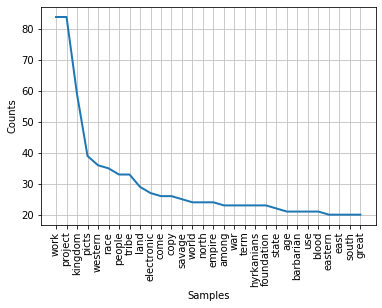

In [32]:
%matplotlib inline
meta_freqdist_1.plot(30, cumulative=False);

In [33]:
cv_1 = CountVectorizer()
cv_1.fit(meta_lemmaed_1)
vector_doc_1 = cv_1.transform(meta_lemmaed_1)
vector_df = pd.DataFrame(vector_doc_1.toarray(), columns=cv_1.get_feature_names())
vector_df.head()

,abandon,abide,able,aboriginal,aborigine,abruptly,absorb,accept,access,accessible,...,young,zamora,zamorian,zamorians,zembabwe,zhemri,zingara,zingarans,zingg,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
resp_2 = requests.get('http://www.gutenberg.org/cache/epub/62/pg62.txt')
stories_2 = resp_2.text

In [35]:
print(stories_2[:868])

﻿The Project Gutenberg EBook of A Princess of Mars, by Edgar Rice Burroughs

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: A Princess of Mars

Author: Edgar Rice Burroughs

Release Date: June 23, 2008 [EBook #62]
Last updated: October 12, 2012
Last updated: December 8, 2012
Last updated: February 6, 2013
Last updated: March 11, 2013

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK A PRINCESS OF MARS ***















[Frontispiece: With my back against a golden throne, I fought once
again for Dejah Thoris]




A PRINCESS OF MARS


by

Edgar Rice Burroughs



To My Son Jack







In [36]:
pattern_2 = "([a-zA-Z]+(?:'[a-z]+)?)"
stories_tokens_raw_2 = nltk.regexp_tokenize(stories_2[868:], pattern_2)
print(stories_tokens_raw_2[:100])

['FOREWORD', 'To', 'the', 'Reader', 'of', 'this', 'Work', 'In', 'submitting', 'Captain', "Carter's", 'strange', 'manuscript', 'to', 'you', 'in', 'book', 'form', 'I', 'believe', 'that', 'a', 'few', 'words', 'relative', 'to', 'this', 'remarkable', 'personality', 'will', 'be', 'of', 'interest', 'My', 'first', 'recollection', 'of', 'Captain', 'Carter', 'is', 'of', 'the', 'few', 'months', 'he', 'spent', 'at', 'my', "father's", 'home', 'in', 'Virginia', 'just', 'prior', 'to', 'the', 'opening', 'of', 'the', 'civil', 'war', 'I', 'was', 'then', 'a', 'child', 'of', 'but', 'five', 'years', 'yet', 'I', 'well', 'remember', 'the', 'tall', 'dark', 'smooth', 'faced', 'athletic', 'man', 'whom', 'I', 'called', 'Uncle', 'Jack', 'He', 'seemed', 'always', 'to', 'be', 'laughing', 'and', 'he', 'entered', 'into', 'the', 'sports', 'of', 'the']


In [37]:
stories_tokens_2 = [i.lower() for i in stories_tokens_raw_2]
print(stories_tokens_2[:100])

['foreword', 'to', 'the', 'reader', 'of', 'this', 'work', 'in', 'submitting', 'captain', "carter's", 'strange', 'manuscript', 'to', 'you', 'in', 'book', 'form', 'i', 'believe', 'that', 'a', 'few', 'words', 'relative', 'to', 'this', 'remarkable', 'personality', 'will', 'be', 'of', 'interest', 'my', 'first', 'recollection', 'of', 'captain', 'carter', 'is', 'of', 'the', 'few', 'months', 'he', 'spent', 'at', 'my', "father's", 'home', 'in', 'virginia', 'just', 'prior', 'to', 'the', 'opening', 'of', 'the', 'civil', 'war', 'i', 'was', 'then', 'a', 'child', 'of', 'but', 'five', 'years', 'yet', 'i', 'well', 'remember', 'the', 'tall', 'dark', 'smooth', 'faced', 'athletic', 'man', 'whom', 'i', 'called', 'uncle', 'jack', 'he', 'seemed', 'always', 'to', 'be', 'laughing', 'and', 'he', 'entered', 'into', 'the', 'sports', 'of', 'the']


In [38]:
stories_tokens_stopped_2 = [w for w in stories_tokens_2 if not w in stop_words]
stories_tokens_stopped_2 = [w for w in stories_tokens_stopped_2 if not w in ['gutenberg', 'tm', 'u']]
print(stories_tokens_stopped_2[:100])

['foreword', 'reader', 'work', 'submitting', 'captain', "carter's", 'strange', 'manuscript', 'book', 'form', 'believe', 'words', 'relative', 'remarkable', 'personality', 'interest', 'first', 'recollection', 'captain', 'carter', 'months', 'spent', "father's", 'home', 'virginia', 'prior', 'opening', 'civil', 'war', 'child', 'five', 'years', 'yet', 'well', 'remember', 'tall', 'dark', 'smooth', 'faced', 'athletic', 'man', 'called', 'uncle', 'jack', 'seemed', 'always', 'laughing', 'entered', 'sports', 'children', 'hearty', 'good', 'fellowship', 'displayed', 'toward', 'pastimes', 'men', 'women', 'age', 'indulged', 'would', 'sit', 'hour', 'time', 'entertaining', 'old', 'grandmother', 'stories', 'strange', 'wild', 'life', 'parts', 'world', 'loved', 'slaves', 'fairly', 'worshipped', 'ground', 'trod', 'splendid', 'specimen', 'manhood', 'standing', 'good', 'two', 'inches', 'six', 'feet', 'broad', 'shoulder', 'narrow', 'hip', 'carriage', 'trained', 'fighting', 'man', 'features', 'regular', 'clear'

In [39]:
stories_lemmas_pos_2 = []
for x, y in nltk.pos_tag(stories_tokens_stopped_2):
    stories_lemmas_pos_2.append((x, get_wordnet_pos(y)))

In [40]:
meta_lemmaed_2 = []
for word, pos in stories_lemmas_pos_2:
    meta_lemmaed_2.append(lemmatizer.lemmatize(word, pos=pos))

In [41]:
meta_freqdist_2 = FreqDist(meta_lemmaed_2)
meta_freqdist_2.most_common(50)

[('upon', 436),
 ('one', 260),
 ('would', 221),
 ('could', 210),
 ('great', 187),
 ('dejah', 179),
 ('thoris', 177),
 ('martian', 170),
 ('warrior', 164),
 ('know', 139),
 ('u', 132),
 ('toward', 123),
 ('come', 122),
 ('little', 120),
 ('see', 118),
 ('sola', 117),
 ('work', 116),
 ('foot', 114),
 ('day', 111),
 ('time', 110),
 ('make', 105),
 ('green', 105),
 ('two', 103),
 ('helium', 103),
 ('first', 101),
 ('men', 101),
 ('city', 101),
 ('find', 96),
 ('tarkas', 96),
 ('tar', 95),
 ('say', 94),
 ('hand', 93),
 ('without', 90),
 ('man', 89),
 ('turn', 89),
 ('project', 87),
 ('leave', 85),
 ('long', 85),
 ('return', 84),
 ('reach', 84),
 ('woman', 82),
 ('take', 82),
 ('back', 79),
 ('seem', 78),
 ('may', 78),
 ('building', 78),
 ('word', 77),
 ('among', 77),
 ('dead', 77),
 ('must', 76)]

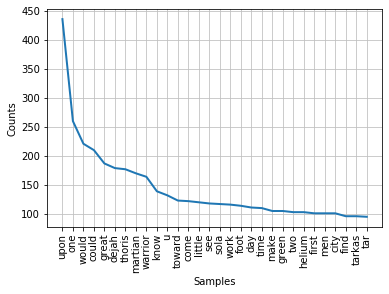

In [42]:
%matplotlib inline
meta_freqdist_2.plot(30, cumulative=False);

In [43]:
cv_2 = CountVectorizer()
cv_2.fit(meta_lemmaed_2)
vector_doc_2 = cv_2.transform(meta_lemmaed_2)
vector_df_2 = pd.DataFrame(vector_doc_2.toarray(), columns=cv_2.get_feature_names())
vector_df_2.head()

,abandon,abash,abide,ability,able,ablest,aboard,abreast,abruptly,absence,...,youth,youthful,zad,zealously,zip,zitidar,zitidars,zodanga,zodangan,zodangans
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
